## Andy Yu

Import necessary libraries: JSON, pandas, and numpy
Code from Python for Data Analysis (McKinney, 2012)

In [1]:
import json
import pandas as pd
import numpy as np

Open method requires path to file to open, this path is stored in variable path.
As stated in the text, records is a list comprehension for loading in the lines of the file.

In [2]:
path = 'data/example.txt'
records = [json.loads(line) for line in open(path)]

Create a pandas DataFrame of the lines in the file.

In [3]:
frame = pd.DataFrame(records)

Narrow frame to exclude entries with missing values.

In [4]:
cframe = frame[frame.a.notnull()]

Narrow frame to find entries that contain string Windows or Not Windows, as a 'simplistic' way of accounting for Windows and non-Windows users

In [5]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')
operating_system

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], dtype='<U11')

Group Windows and non-Windows users by respective timeszones. Fill NA values with 0.

In [6]:
by_tz_os = cframe.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


Sort then take top 10 timezones separated by Windows and non-Windows users.

In [7]:
indexer = agg_counts.sum(1).argsort()
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


Make a normalized stacked bar plot of the data that has been cleaned and stored in count_subset.

<AxesSubplot:ylabel='tz'>

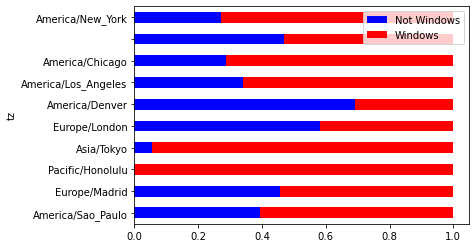

In [8]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True, color={'Not Windows': 'blue', 'Windows':'red'})